In [ ]:
%matplotlib inline 

In [16]:
import sys
sys.version

'3.9.7 | packaged by conda-forge | (default, Sep 29 2021, 19:20:46) \n[GCC 9.4.0]'

# import

In [1]:
import os,sys
#import the required modules. 
os.chdir("/home/jovyan/LateralSDE/codes/")
from RequiredModules import *

ROOT = "/home/jovyan/"
figspath = "/home/jovyan/LateralSDE/figs/p63f11/"
dataspath = "/home/jovyan/LateralSDE/datas/p63f11/"


os.chdir("/home/jovyan/")
import LateralSDE.codes.IrregularDrivingBehaviour as irre

In [2]:
reload(irre)

<module 'LateralSDE.codes.IrregularDrivingBehaviour' from '/home/jovyan/LateralSDE/codes/IrregularDrivingBehaviour.py'>

# The profile function

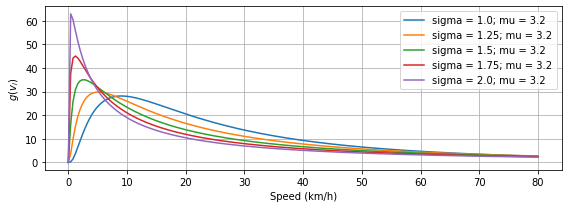

In [5]:
import math
from scipy import stats
# standard deviation of normal distribution
sigma = 0.859455801705594
# mean of normal distribution
mu = 0.418749176686875
# hopefully, total is the value where you need the cdf
total = 37
frozen_lognorm = stats.lognorm(s=sigma, scale=math.exp(mu))
frozen_lognorm.cdf(total) # use whatever function and value you need here
#
fig,ax = plt.subplots(figsize = (8,  3))
sigmas = np.linspace(1, 2, 5)
for sigma in sigmas:
    mu = 3.2
    vs = np.linspace(0, 80, 200)
    ys = [1050.0*scipy.stats.lognorm(s = sigma, scale= math.exp(mu)).pdf(v) for v in vs]
    ax.plot(vs, ys, label = 'sigma = ' + str(round(sigma, 2 ))+ '; mu = 3.2')
    ax.set_xlabel('Speed (km/h)');ax.set_ylabel('$g(v_i)$')
ax.grid('on');ax.legend()
#
#plt.tight_layout();plt.savefig(figspath + 'lognromal_approximation1.jpg', dpi = 500)

# Sim jerk profile without and with jump term

## without the jump term

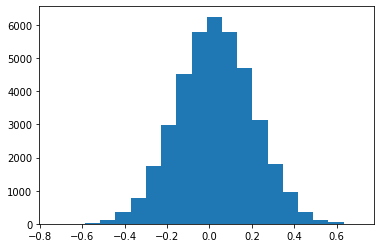

In [12]:
#########################Generate the jump sizes, jump moments and the adapted_ts
reload(irre)
T_horizon_sec = 50
ts = np.linspace(0, T_horizon_sec, int(T_horizon_sec/.4))
#
N_paths = 500
leader_speed = 10.0
init_states  = [np.array([.0, 1.0, .0, .0, .0,.0])]
#
jumptimes_vehs_paths, jumpsizes_vehs_paths = irre.JumpDiffusionDrivingBehavior.\
        JumpMomentsWithJumpSizes_multiplevehicles(T_horizon_sec = T_horizon_sec, N_paths = N_paths, \
        jumpdensities = [10], jumpdis_types = ['Normal'], args_jumpsize_diss = [{'mu':.0, 'sigma': .05}], )
#
adapted_ts,jumpsizes_adapted_vehs_paths = irre.JumpDiffusionDrivingBehavior.\
        AdaptEuler_still_regular(ts = ts, jumptimes_vehs_paths = jumptimes_vehs_paths, jumpsizes_vehs_paths = jumpsizes_vehs_paths)
leaderstates = irre.SingleLaneSim.LeaderVehicleState_constancespeed(ts = adapted_ts, \
    init_state = np.array([100000.0, 10, .0, .0, .00001, .00001]), v_ms = leader_speed)
#
reload(irre)
#speed_dependent_jerk, constant
#
two_dim_paras = {'alpha_roadbounds': 1.0 , 'beta_lane_marks':3.6, 'beta_lane_middle_line': 1.0, \
    'sigma_long': .5, 'sigma_lat':.1, 'sigma_long_drift':1.0, 'sigma_lat_drift':1.0, 'theta_ou':.1, \
            'amplyfier_bound': 1.0, 'amplyfier_lane_mark': 1.0,  'amplyfier_intra_lanes_long': 1e-2, 'amplyfier_intra_lanes_lat':1e-2}
#sim_paths[veh_idx][path_idx] = pd, columns are moments, which is the same as input arg ts.
sim_paths = irre.SingleLaneSim.sim_openroad_pure_HDVs_withjumps(N_paths = N_paths, \
    adapted_ts = adapted_ts, jumpsizes_adapted_vehs_paths = jumpsizes_adapted_vehs_paths, \
    init_states = init_states, leader_states = leaderstates,  tao_delay = .4, two_dim_paras = two_dim_paras, \
    acc_model = 'IDM', diffusion_typee = 'constant',  jump_term_type = False, jerk_constraint = True)
#Jerks = irre.DataAnalysis.JerkFromSimPaths(sim_paths)
Jerks = irre.DataAnalysis.JerkFromSimPaths(sim_paths)
#plt.hist(Jerks[0].iloc[:,-1], bins = 20);
plt.hist(Jerks[0].iloc[:,-80:-1].values.flatten(), bins = 20);

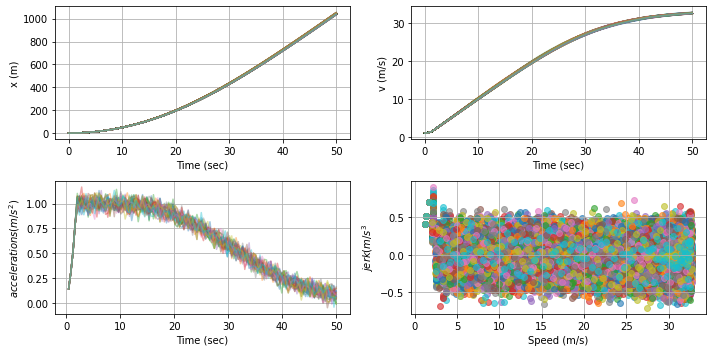

In [13]:
reload(irre)
ax = irre.SingleLaneSim.plot_opensim_leaderstates_followerpaths_im(leaderstates = False, \
                followerssim_paths = sim_paths, figsize = (10, 5), n_acceleration_plotted = 30)
plt.tight_layout()
#ax.set_xlim([0, 60]);ax.set_ylim([-5000, -3000])
#plt.tight_layout();plt.savefig(figspath + '2023ieeeiv_speed_diffusion_no_jump.png', dpi = 600)
###########################################################SAVE
#filenamee = 'constant_diffusion_no_jump'
#plt.tight_layout();plt.savefig(figspath + filenamee+ '.jpg', dpi = 500)
#plt.tight_layout();plt.savefig(figspath + filenamee+ '.pdf', dpi = 500)

## with jump term

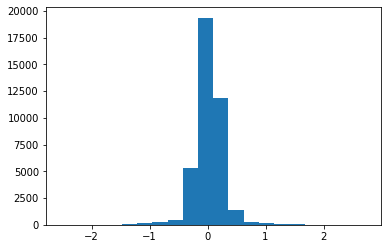

In [14]:
#########################Generate the jump sizes, jump moments and the adapted_ts
reload(irre)
T_horizon_sec = 50
ts = np.linspace(0, T_horizon_sec, int(T_horizon_sec/.4))
#
N_paths = 500
leader_speed = 10.0
init_states  = [np.array([.0, 1.0, .0, .0, .0,.0])]
#
jumptimes_vehs_paths, jumpsizes_vehs_paths = irre.JumpDiffusionDrivingBehavior.\
        JumpMomentsWithJumpSizes_multiplevehicles(T_horizon_sec = T_horizon_sec, N_paths = N_paths, \
        jumpdensities = [10], jumpdis_types = ['Normal'], args_jumpsize_diss = [{'mu':.0, 'sigma': .05}], )
#
adapted_ts,jumpsizes_adapted_vehs_paths = irre.JumpDiffusionDrivingBehavior.\
        AdaptEuler_still_regular(ts = ts, jumptimes_vehs_paths = jumptimes_vehs_paths, jumpsizes_vehs_paths = jumpsizes_vehs_paths)
leaderstates = irre.SingleLaneSim.LeaderVehicleState_constancespeed(ts = adapted_ts, \
    init_state = np.array([100000.0, 10, .0, .0, .00001, .00001]), v_ms = leader_speed)
#
reload(irre)
#speed_dependent_jerk, constant
#
two_dim_paras = {'alpha_roadbounds': 1.0 , 'beta_lane_marks':3.6, 'beta_lane_middle_line': 1.0, \
    'sigma_long': .5, 'sigma_lat':.1, 'sigma_long_drift':1.0, 'sigma_lat_drift':1.0, 'theta_ou':.1, \
            'amplyfier_bound': 1.0, 'amplyfier_lane_mark': 1.0,  'amplyfier_intra_lanes_long': 1e-2, 'amplyfier_intra_lanes_lat':1e-2}
#sim_paths[veh_idx][path_idx] = pd, columns are moments, which is the same as input arg ts.
sim_paths = irre.SingleLaneSim.sim_openroad_pure_HDVs_withjumps(N_paths = N_paths, \
    adapted_ts = adapted_ts, jumpsizes_adapted_vehs_paths = jumpsizes_adapted_vehs_paths, \
    init_states = init_states, leader_states = leaderstates,  tao_delay = .4, two_dim_paras = two_dim_paras, \
    acc_model = 'IDM', diffusion_typee = 'constant',  jump_term_type = 'speed_dependent_jerk', jerk_constraint = True)
#Jerks = irre.DataAnalysis.JerkFromSimPaths(sim_paths)
Jerks = irre.DataAnalysis.JerkFromSimPaths(sim_paths)
#plt.hist(Jerks[0].iloc[:,-1], bins = 20);
plt.hist(Jerks[0].iloc[:,-80:-1].values.flatten(), bins = 20);

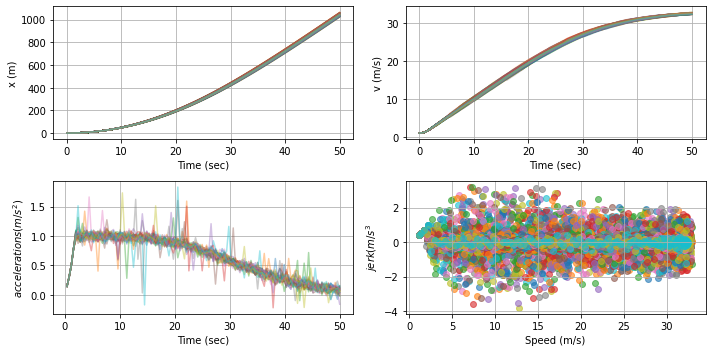

In [15]:
reload(irre)
ax = irre.SingleLaneSim.plot_opensim_leaderstates_followerpaths_im(leaderstates = False, \
                followerssim_paths = sim_paths, figsize = (10, 5), n_acceleration_plotted = 30)
plt.tight_layout()
#ax.set_xlim([0, 60]);ax.set_ylim([-5000, -3000])
#plt.tight_layout();plt.savefig(figspath + '2023ieeeiv_speed_diffusion_no_jump.png', dpi = 600)
###########################################################SAVE
#filenamee = 'constant_diffusion_no_jump'
#plt.tight_layout();plt.savefig(figspath + filenamee+ '.jpg', dpi = 500)
#plt.tight_layout();plt.savefig(figspath + filenamee+ '.pdf', dpi = 500)

## comparison

In [6]:
#########################Generate the jump sizes, jump moments and the adapted_ts
reload(irre)
T_horizon_sec = 50
ts = np.linspace(0, T_horizon_sec, int(T_horizon_sec/.4))
#
N_paths = 500
leader_speed = 10.0
init_states  = [np.array([.0, 1.0, .0, .0, .0,.0])]
#
jumptimes_vehs_paths, jumpsizes_vehs_paths = irre.JumpDiffusionDrivingBehavior.\
        JumpMomentsWithJumpSizes_multiplevehicles(T_horizon_sec = T_horizon_sec, N_paths = N_paths, \
        jumpdensities = [10], jumpdis_types = ['Normal'], args_jumpsize_diss = [{'mu':.0, 'sigma': .05}], )
#
adapted_ts,jumpsizes_adapted_vehs_paths = irre.JumpDiffusionDrivingBehavior.\
        AdaptEuler_still_regular(ts = ts, jumptimes_vehs_paths = jumptimes_vehs_paths, jumpsizes_vehs_paths = jumpsizes_vehs_paths)
###########The state of the leading vehicle. 
leaderstates = irre.SingleLaneSim.LeaderVehicleState_constancespeed(ts = adapted_ts, \
    init_state = np.array([100000.0, 10, .0, .0, .00001, .00001]), v_ms = leader_speed)

In [7]:
#
reload(irre)
#speed_dependent_jerk, constant
#
two_dim_paras = {'alpha_roadbounds': 1.0 , 'beta_lane_marks':3.6, 'beta_lane_middle_line': 1.0, \
    'sigma_long': .5, 'sigma_lat':.1, 'sigma_long_drift':1.0, 'sigma_lat_drift':1.0, 'theta_ou':.1, \
            'amplyfier_bound': 1.0, 'amplyfier_lane_mark': 1.0,  'amplyfier_intra_lanes_long': 1e-2, 'amplyfier_intra_lanes_lat':1e-2}
##########Both jump and diffusion, and jump is speed depent jerk. 
sim_paths1 = irre.SingleLaneSim.sim_openroad_pure_HDVs_withjumps(N_paths = N_paths, \
    adapted_ts = adapted_ts, jumpsizes_adapted_vehs_paths = jumpsizes_adapted_vehs_paths, \
    init_states = init_states, leader_states = leaderstates,  tao_delay = .4, two_dim_paras = two_dim_paras, \
    acc_model = 'IDM', diffusion_typee = 'constant',  jump_term_type = 'speed_dependent_jerk', jerk_constraint = True)
##########no jump, but diffusion
sim_paths2 = irre.SingleLaneSim.sim_openroad_pure_HDVs_withjumps(N_paths = N_paths, \
    adapted_ts = adapted_ts, jumpsizes_adapted_vehs_paths = jumpsizes_adapted_vehs_paths, \
    init_states = init_states, leader_states = leaderstates,  tao_delay = .4, two_dim_paras = two_dim_paras, \
    acc_model = 'IDM', diffusion_typee = 'constant',  jump_term_type = False, jerk_constraint = True)
##########no diffusion, but and diffusion
sim_paths3 = irre.SingleLaneSim.sim_openroad_pure_HDVs_withjumps(N_paths = N_paths, \
    adapted_ts = adapted_ts, jumpsizes_adapted_vehs_paths = jumpsizes_adapted_vehs_paths, \
    init_states = init_states, leader_states = leaderstates,  tao_delay = .4, two_dim_paras = two_dim_paras, \
    acc_model = 'IDM', diffusion_typee = False,  jump_term_type = 'speed_dependent_jerk', jerk_constraint = True)

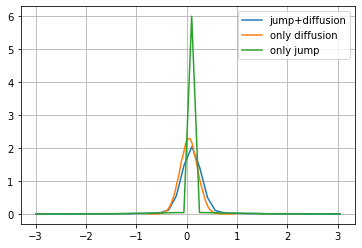

In [8]:
#############################################
###############Plot the distribution
#####################################
reload(irre)
fig,ax = plt.subplots()
alpha = 1.0; bins = 40; N=100
#Jerks = irre.DataAnalysis.JerkFromSimPaths(sim_paths)
Jerks = irre.DataAnalysis.JerkFromSimPaths(sim_paths1)
hs,es = irre.hist2distribution(Jerks[0].iloc[:,-N:-1].values.flatten(), bins = bins)
ax.plot(es, hs, alpha = alpha, label = 'jump+diffusion');
#===========
#Jerks = irre.DataAnalysis.JerkFromSimPaths(sim_paths)
Jerks = irre.DataAnalysis.JerkFromSimPaths(sim_paths2)
hs,es = irre.hist2distribution(Jerks[0].iloc[:,-N:-1].values.flatten(), bins = bins)
ax.plot(es, hs, alpha = alpha, label = 'only diffusion');
#============
#Jerks = irre.DataAnalysis.JerkFromSimPaths(sim_paths)
Jerks = irre.DataAnalysis.JerkFromSimPaths(sim_paths3)
hs,es = irre.hist2distribution(Jerks[0].iloc[:,-N:-1].values.flatten(), bins = bins)
ax.plot(es, hs, alpha = alpha, label = 'only jump');
#
ax.legend();ax.grid('on')

In [9]:
reload(irre)
ax = irre.SingleLaneSim.plot_opensim_leaderstates_followerpaths_im(leaderstates = False, \
                followerssim_paths = sim_paths, figsize = (10, 5), n_acceleration_plotted = 30)
plt.tight_layout()
#ax.set_xlim([0, 60]);ax.set_ylim([-5000, -3000])
#plt.tight_layout();plt.savefig(figspath + '2023ieeeiv_speed_diffusion_no_jump.png', dpi = 600)
###########################################################SAVE
filenamee = 'constant_diffusion_no_jump'
plt.tight_layout();plt.savefig(figspath + filenamee+ '.jpg', dpi = 500)
plt.tight_layout();plt.savefig(figspath + filenamee+ '.pdf', dpi = 500)

NameError: name 'sim_paths' is not defined

# Simulation two dimensional trajectories

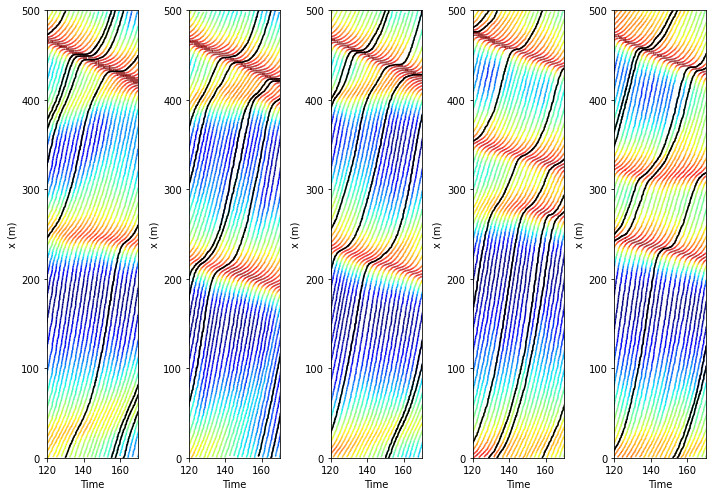

In [11]:
reload(irre)
T_horizon_sec = 400
ts = np.linspace(0, T_horizon_sec, int(T_horizon_sec/.4))
N_irregulars = 5
length = 500
fig,axs = plt.subplots(ncols= 5, figsize = (10, 7))
SNAPTHOTS = {}
for i,sigma in enumerate(np.linspace(0, 5, 5)):
    args_jumpsize_diss = [{'mu':.0, 'sigma': sigma} for i in range(N_irregulars)]
    jumpdensities =  [1 for i in range(N_irregulars)]
    jumpdis_types =  ['Normal' for i in range(N_irregulars)]
    jumptimes_es_es,jumpsizes_es_es = irre.JumpDiffusionDrivingBehavior.JumpMomentsWithJumpSizes_multiplevehicles(\
                T_horizon_sec= T_horizon_sec, jumpdis_types = jumpdis_types, \
                args_jumpsize_diss = args_jumpsize_diss, jumpdensities = jumpdensities, N_paths  = 1)
    #
    adapted_ts,jump_or_nots_lists,jumpsizes_adapted_lists = irre.JumpDiffusionDrivingBehavior.AdaptEuler(ts = ts, \
                                    jumptimes_vehs_paths = jumptimes_es_es, jumpsizes_vehs_paths = jumpsizes_es_es, )
    #####################################SIMULATION AND PLOT
    two_dim_paras = {'alpha_roadbounds': 1.0 , 'beta_lane_marks':3.6, 'beta_lane_middle_line': 1.0, \
        'sigma_long': .5, 'sigma_lat':.1, 'sigma_long_drift':1.0, 'sigma_lat_drift':1.0, 'theta_ou':.1, \
                'amplyfier_bound': 1.0, 'amplyfier_lane_mark': 1.0,  'amplyfier_intra_lanes_long': 1e-2, 'amplyfier_intra_lanes_lat':1e-2}
    #
    road = irre.SingleLaneSim(length=length)
    if sigma ==0:
        STATES,irregular_vehs_ids = road.sim_insert_all_vehs_at_once_jump(adapted_ts = adapted_ts, \
                        jumpsizes_adapted_lists = jumpsizes_adapted_lists, desired_density = 80, \
                        two_dim_paras = two_dim_paras, two_dim_paras_irregular = two_dim_paras, jump_or_not = False, delay_tao_sec = .4)
    else:
        STATES,irregular_vehs_ids = road.sim_insert_all_vehs_at_once_jump(adapted_ts = adapted_ts, \
                        jumpsizes_adapted_lists = jumpsizes_adapted_lists, desired_density = 80, \
                        two_dim_paras = two_dim_paras, two_dim_paras_irregular = two_dim_paras, jump_or_not = True, delay_tao_sec = .4)
    #
    ax = axs[i]
    SNAPTHOTS[i] = copy.deepcopy(road.snapshots)
    #
    ax = irre.SingleLaneSim.plot_speed_profile_singlelane_trajectories(road.snapshots, length=500, \
                figsize = (2.5, 7), cmap = 'jet_r', alpha = 1.0, blacked_trajectory_vids = irregular_vehs_ids, ax  = ax)
    ax.set_xlim([120, 170])
    ax.set_ylim([0, road.length])
plt.tight_layout();#
#plt.savefig(figspath + 'SingleLaneSimulationHeatmap.png', dpi = 600)